<a href="https://www.kaggle.com/code/manish5323/covid-19-us-county-jhu-data-demographics?scriptVersionId=230363625" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-us-county-jhu-data-demographics/covid_us_county.csv
/kaggle/input/covid19-us-county-jhu-data-demographics/us_county.dbf
/kaggle/input/covid19-us-county-jhu-data-demographics/us_county.shx
/kaggle/input/covid19-us-county-jhu-data-demographics/us_county.csv
/kaggle/input/covid19-us-county-jhu-data-demographics/us_county.shp
/kaggle/input/covid19-us-county-jhu-data-demographics/us_county.prj


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# Seaborn styling
sns.set_style("whitegrid")

In [3]:
# Step 2.1: Check Dataset Path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/covid19-us-county-jhu-data-demographics/covid_us_county.csv
/kaggle/input/covid19-us-county-jhu-data-demographics/us_county.dbf
/kaggle/input/covid19-us-county-jhu-data-demographics/us_county.shx
/kaggle/input/covid19-us-county-jhu-data-demographics/us_county.csv
/kaggle/input/covid19-us-county-jhu-data-demographics/us_county.shp
/kaggle/input/covid19-us-county-jhu-data-demographics/us_county.prj


In [4]:
# Step 2.2: Load the Dataset
covid_data = pd.read_csv("/kaggle/input/covid19-us-county-jhu-data-demographics/covid_us_county.csv")

# Preview the dataset
covid_data.head()


<ipython-input-4-cc7ecfd44fc8>:2: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_data = pd.read_csv("/kaggle/input/covid19-us-county-jhu-data-demographics/covid_us_county.csv")


,fips,county,state,lat,long,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,...,2/19/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,18961,18961,18961,19205,19205,...,19686,19732,19732,19732,19732,19732,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,18961,18961,18961,19205,19205,...,19686,19732,19732,19732,19732,19732,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,18961,18961,18961,19205,19205,...,19686,19732,19732,19732,19732,19732,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,18961,18961,18961,19205,19205,...,19686,19732,19732,19732,19732,19732,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,18961,18961,18961,19205,19205,...,19686,19732,19732,19732,19732,19732,2020-01-26,0,AL,0


In [5]:
# Step 3.1: Inspect the Data
covid_data.info()

# Check for missing values
covid_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612702 entries, 0 to 3612701
Data columns (total 61 columns):
 #   Column      Dtype  
---  ------      -----  
 0   fips        float64
 1   county      object 
 2   state       object 
 3   lat         float64
 4   long        float64
 5   1/1/23      int64  
 6   1/2/23      int64  
 7   1/3/23      int64  
 8   1/4/23      int64  
 9   1/5/23      int64  
 10  1/6/23      int64  
 11  1/7/23      int64  
 12  1/8/23      int64  
 13  1/9/23      int64  
 14  1/10/23     int64  
 15  1/11/23     int64  
 16  1/12/23     int64  
 17  1/13/23     int64  
 18  1/14/23     int64  
 19  1/15/23     int64  
 20  1/16/23     int64  
 21  1/17/23     int64  
 22  1/18/23     int64  
 23  1/19/23     int64  
 24  1/23/23     int64  
 25  1/24/23     int64  
 26  1/25/23     int64  
 27  1/26/23     int64  
 28  1/27/23     int64  
 29  1/28/23     int64  
 30  1/29/23     int64  
 31  1/30/23     int64  
 32  1/31/23     int64  
 33  2/1/23 

fips          10810
county         6486
state             0
lat               0
long              0
              ...  
2/27/23           0
date              0
cases             0
state_code    96209
deaths            0
Length: 61, dtype: int64

In [6]:
# Step 3.2: Clean the Data
covid_data.dropna(inplace=True)  # Drop rows with missing values
covid_data.drop_duplicates(inplace=True)  # Remove duplicate rows

# Convert date column to datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Sort values for time series analysis
covid_data.sort_values(by='date', inplace=True)

# Reset index
covid_data.reset_index(drop=True, inplace=True)

# Quick summary
covid_data.describe()


,fips,lat,long,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,...,2/18/23,2/19/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,date,cases,deaths
count,3.505683e+06,3.505683e+06,3.505683e+06,3.505683e+06,3.505683e+06,3.505683e+06,3.505683e+06,3.505683e+06,3.505683e+06,3.505683e+06,...,3.505683e+06,3.505683e+06,3.505683e+06,3.505683e+06,3.505683e+06,3.505683e+06,3.505683e+06,3505683,3.505683e+06,3.505683e+06
mean,3.205720e+04,3.728331e+01,-8.948716e+01,3.052189e+04,3.052445e+04,3.055819e+04,3.061910e+04,3.065137e+04,3.067093e+04,3.067273e+04,...,3.123406e+04,3.123413e+04,3.130258e+04,3.130694e+04,3.130751e+04,3.130781e+04,3.131256e+04,2021-07-15 04:23:45.346900992,1.334336e+04,1.823063e+02
min,1.001000e+03,0.000000e+00,-1.741596e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2020-01-22 00:00:00,-3.073000e+03,-8.200000e+01
25%,1.904100e+04,3.426744e+01,-9.806663e+01,2.759000e+03,2.759000e+03,2.759000e+03,2.774000e+03,2.775000e+03,2.775000e+03,2.775000e+03,...,2.821000e+03,2.821000e+03,2.824000e+03,2.819000e+03,2.819000e+03,2.819000e+03,2.819000e+03,2020-10-18 00:00:00,2.900000e+02,4.000000e+00
50%,3.004500e+04,3.816405e+01,-8.991556e+01,7.465000e+03,7.465000e+03,7.476000e+03,7.482000e+03,7.486000e+03,7.482000e+03,7.482000e+03,...,7.599000e+03,7.599000e+03,7.607000e+03,7.607000e+03,7.607000e+03,7.607000e+03,7.607000e+03,2021-07-15 00:00:00,2.113000e+03,3.700000e+01
75%,4.700700e+04,4.168625e+01,-8.285346e+01,1.997200e+04,1.997200e+04,1.997200e+04,2.002200e+04,2.002200e+04,2.002200e+04,2.002200e+04,...,2.041100e+04,2.041100e+04,2.047300e+04,2.047300e+04,2.047300e+04,2.047300e+04,2.047300e+04,2022-04-11 00:00:00,7.607000e+03,1.190000e+02
max,9.005600e+04,6.931479e+01,0.000000e+00,3.631736e+06,3.631736e+06,3.638639e+06,3.640865e+06,3.640865e+06,3.646917e+06,3.646917e+06,...,3.691301e+06,3.691301e+06,3.696875e+06,3.697797e+06,3.697797e+06,3.697797e+06,3.697797e+06,2023-02-22 00:00:00,3.691301e+06,3.525000e+04
std,1.769462e+04,8.474588e+00,2.048118e+01,1.069932e+05,1.069973e+05,1.071431e+05,1.072669e+05,1.073337e+05,1.075494e+05,1.075525e+05,...,1.092180e+05,1.092181e+05,1.094912e+05,1.095107e+05,1.095113e+05,1.095118e+05,1.095208e+05,NaN,6.032997e+04,7.579004e+02


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

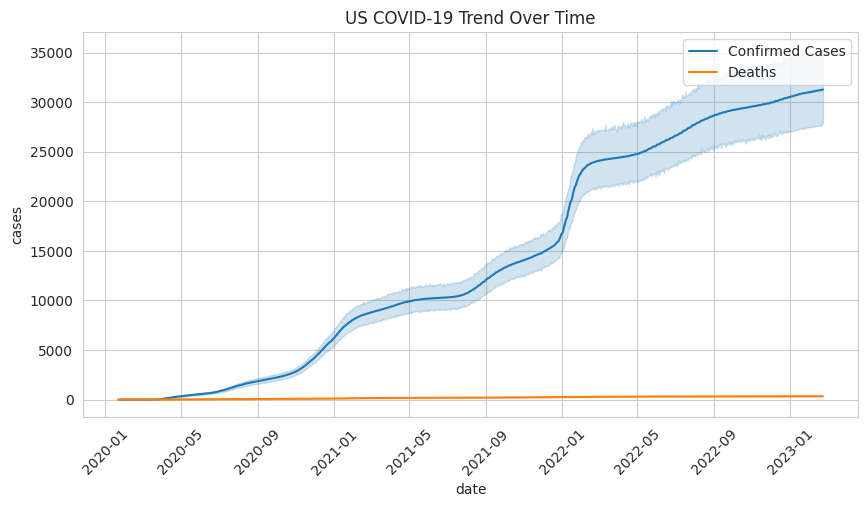

In [7]:
# Step 4.1: National Trend Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=covid_data, x='date', y='cases', label='Confirmed Cases')
sns.lineplot(data=covid_data, x='date', y='deaths', label='Deaths')
plt.title("US COVID-19 Trend Over Time")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

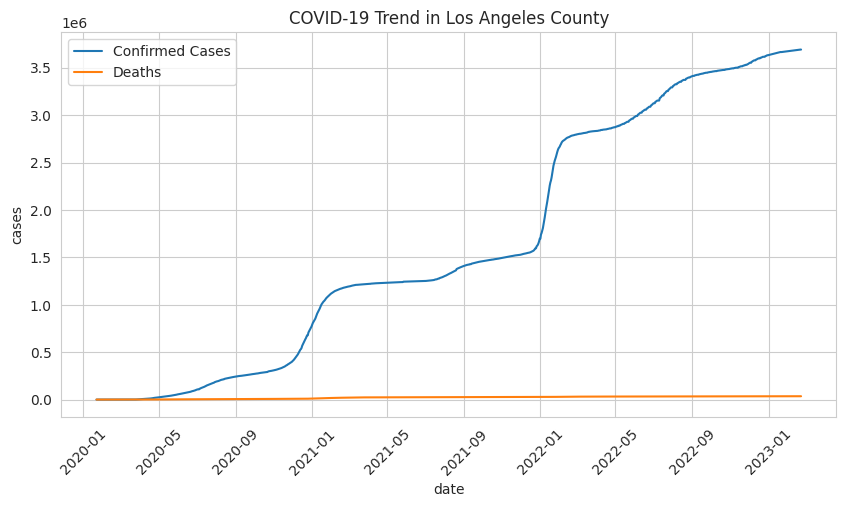

In [8]:
# Step 4.2: Analysis for a Specific County
county_name = 'Los Angeles'
county_data = covid_data[covid_data['county'] == county_name]

plt.figure(figsize=(10, 5))
sns.lineplot(data=county_data, x='date', y='cases', label='Confirmed Cases')
sns.lineplot(data=county_data, x='date', y='deaths', label='Deaths')
plt.title(f"COVID-19 Trend in {county_name} County")
plt.xticks(rotation=45)
plt.show()


In [9]:
# Step 4.3: Comparative Analysis for Selected Counties
selected_counties = ['Los Angeles', 'Cook', 'Harris', 'Maricopa', 'Miami-Dade']
top_counties = covid_data[covid_data['county'].isin(selected_counties)]

fig = px.line(
    top_counties,
    x='date',
    y='cases',
    color='county',
    title="Comparative COVID-19 Analysis (Top 5 US Counties)"
)
fig.show()


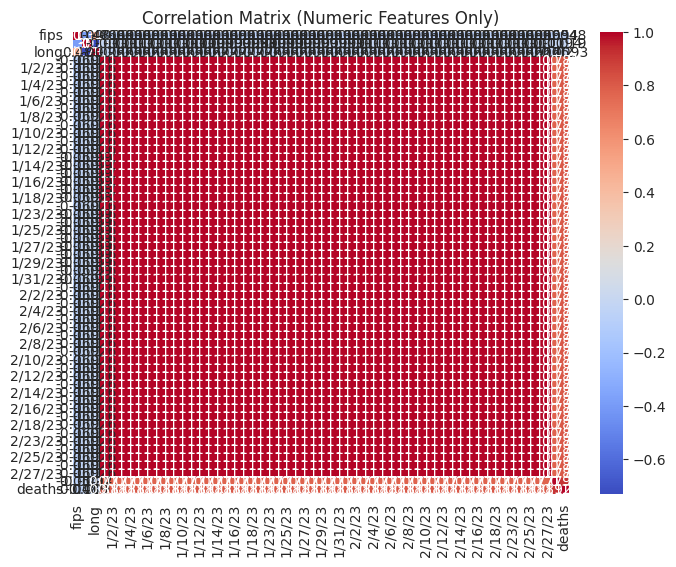

In [10]:
# Step 4.4: Correlation Heatmap (Fixed)
# Select only numeric columns for correlation
numeric_data = covid_data.select_dtypes(include=['float64', 'int64'])

# Check if numeric_data is empty
if numeric_data.empty:
    print("No numeric columns available for correlation.")
else:
    # Plot the correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix (Numeric Features Only)")
    plt.show()


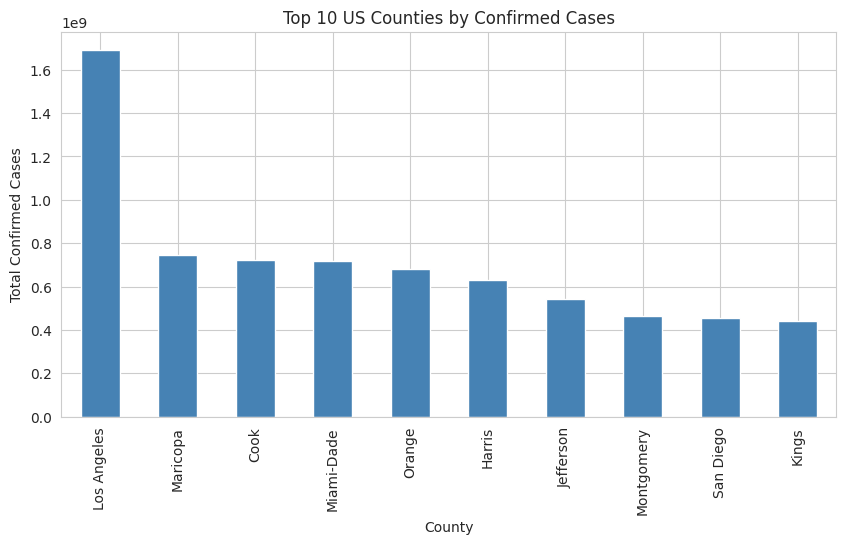

In [11]:
# Step 5.1: Top 10 Counties by Confirmed Cases
top_counties_cases = covid_data.groupby('county')['cases'].sum().sort_values(ascending=False).head(10)

top_counties_cases.plot(kind='bar', color='steelblue', figsize=(10, 5))
plt.title("Top 10 US Counties by Confirmed Cases")
plt.xlabel("County")
plt.ylabel("Total Confirmed Cases")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



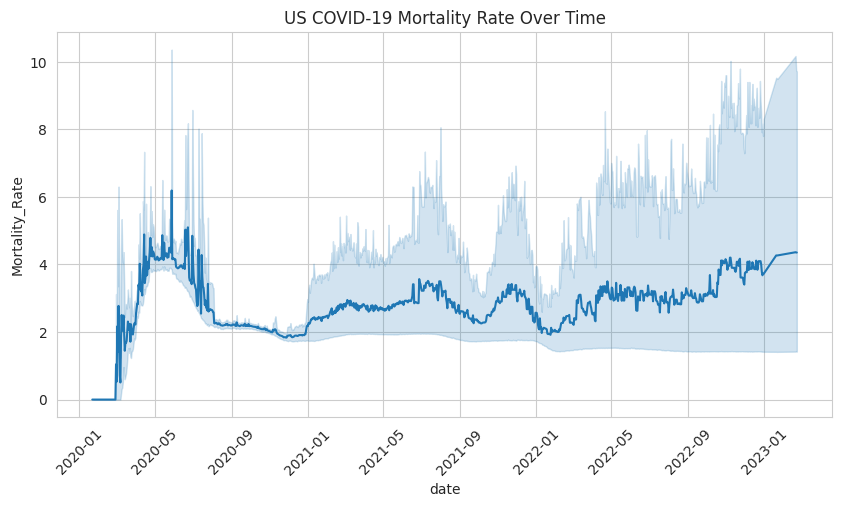

In [12]:
# Step 5.2: Mortality Rate Calculation
covid_data['Mortality_Rate'] = (covid_data['deaths'] / covid_data['cases']) * 100

# Plot Mortality Rate
plt.figure(figsize=(10, 5))
sns.lineplot(data=covid_data, x='date', y='Mortality_Rate')
plt.title("US COVID-19 Mortality Rate Over Time")
plt.xticks(rotation=45)
plt.show()


In [13]:
# Check column names and preview the dataset
print(covid_data.columns)
covid_data.head()


Index(['fips', 'county', 'state', 'lat', 'long', '1/1/23', '1/2/23', '1/3/23',
       '1/4/23', '1/5/23', '1/6/23', '1/7/23', '1/8/23', '1/9/23', '1/10/23',
       '1/11/23', '1/12/23', '1/13/23', '1/14/23', '1/15/23', '1/16/23',
       '1/17/23', '1/18/23', '1/19/23', '1/23/23', '1/24/23', '1/25/23',
       '1/26/23', '1/27/23', '1/28/23', '1/29/23', '1/30/23', '1/31/23',
       '2/1/23', '2/2/23', '2/3/23', '2/4/23', '2/5/23', '2/6/23', '2/7/23',
       '2/8/23', '2/9/23', '2/10/23', '2/11/23', '2/12/23', '2/13/23',
       '2/14/23', '2/15/23', '2/16/23', '2/17/23', '2/18/23', '2/19/23',
       '2/23/23', '2/24/23', '2/25/23', '2/26/23', '2/27/23', 'date', 'cases',
       'state_code', 'deaths', 'Mortality_Rate'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,fips,county,state,lat,long,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,...,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,date,cases,state_code,deaths,Mortality_Rate
0,1001.0,Autauga,Alabama,32.539527,-86.644082,18961,18961,18961,19205,19205,...,19732,19732,19732,19732,19732,2020-01-22,0,AL,0,NaN
1,48141.0,El Paso,Texas,31.769808,-106.236328,250397,250397,250397,251209,251209,...,255219,255219,255219,255219,255219,2020-01-22,0,TX,0,NaN
2,13241.0,Rabun,Georgia,34.883894,-83.403046,4038,4038,4038,4046,4046,...,4102,4102,4102,4102,4102,2020-01-22,0,GA,0,NaN
3,48139.0,Ellis,Texas,32.348941,-96.793718,56565,56565,56565,56810,56810,...,57701,57701,57701,57701,57701,2020-01-22,0,TX,0,NaN
4,13239.0,Quitman,Georgia,31.867281,-85.017732,527,527,527,530,530,...,549,549,549,549,549,2020-01-22,0,GA,0,NaN


In [14]:
# Check for missing values
print(covid_data.isnull().sum())


fips                   0
county                 0
state                  0
lat                    0
long                   0
                   ...  
date                   0
cases                  0
state_code             0
deaths                 0
Mortality_Rate    322523
Length: 62, dtype: int64


In [15]:
# Check column names
print(covid_data.columns)


Index(['fips', 'county', 'state', 'lat', 'long', '1/1/23', '1/2/23', '1/3/23',
       '1/4/23', '1/5/23', '1/6/23', '1/7/23', '1/8/23', '1/9/23', '1/10/23',
       '1/11/23', '1/12/23', '1/13/23', '1/14/23', '1/15/23', '1/16/23',
       '1/17/23', '1/18/23', '1/19/23', '1/23/23', '1/24/23', '1/25/23',
       '1/26/23', '1/27/23', '1/28/23', '1/29/23', '1/30/23', '1/31/23',
       '2/1/23', '2/2/23', '2/3/23', '2/4/23', '2/5/23', '2/6/23', '2/7/23',
       '2/8/23', '2/9/23', '2/10/23', '2/11/23', '2/12/23', '2/13/23',
       '2/14/23', '2/15/23', '2/16/23', '2/17/23', '2/18/23', '2/19/23',
       '2/23/23', '2/24/23', '2/25/23', '2/26/23', '2/27/23', 'date', 'cases',
       'state_code', 'deaths', 'Mortality_Rate'],
      dtype='object')


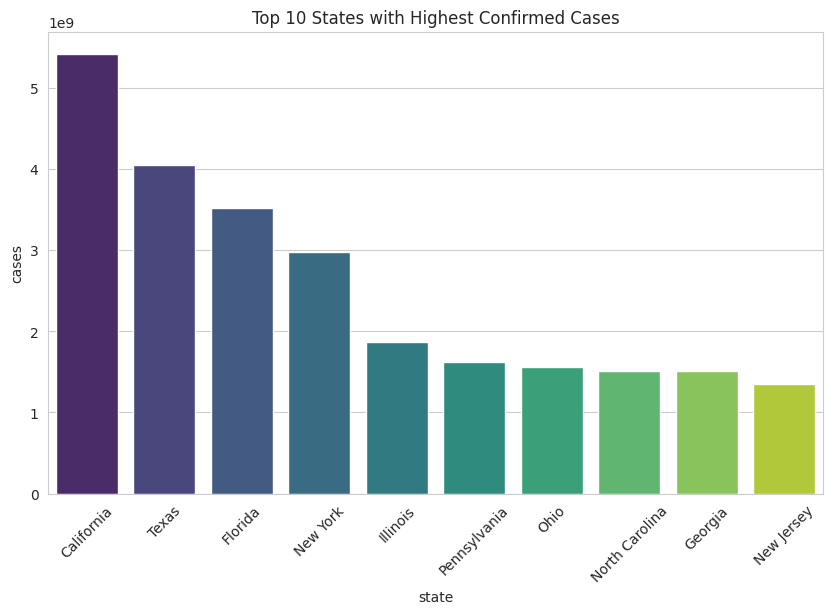

In [16]:
# Use the correct column names based on the inspection
state_wise_data = covid_data.groupby('state')[['cases', 'deaths']].sum().sort_values(by='cases', ascending=False)
top_10_states = state_wise_data.head(10)

# Plot the top 10 affected states
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_states.index, y=top_10_states['cases'], palette="viridis")
plt.title("Top 10 States with Highest Confirmed Cases")
plt.xticks(rotation=45)
plt.show()


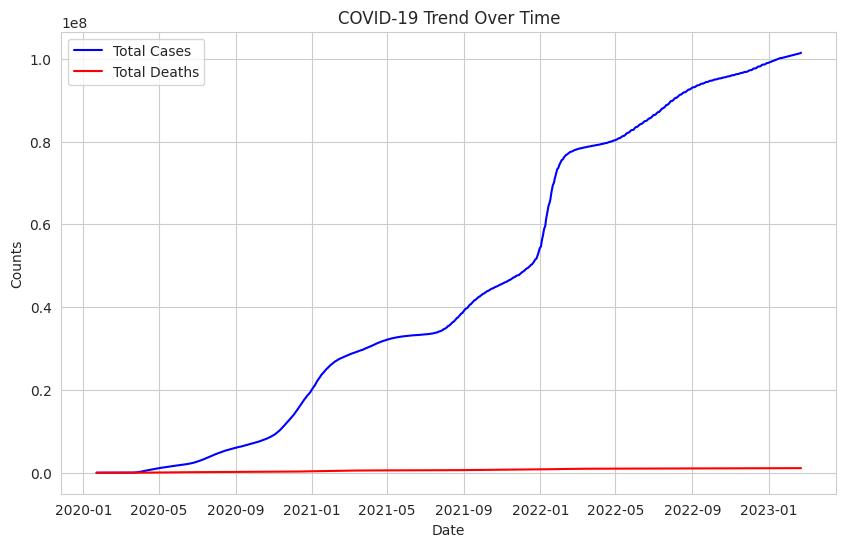

In [17]:
# Step 6: Time Series Analysis - Trend Over Time
covid_data['date'] = pd.to_datetime(covid_data['date'])  # Ensure 'date' is in datetime format

# Group data by date to get total cases and deaths over time
time_series_data = covid_data.groupby('date')[['cases', 'deaths']].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['cases'], label='Total Cases', color='b')
plt.plot(time_series_data.index, time_series_data['deaths'], label='Total Deaths', color='r')
plt.xlabel("Date")
plt.ylabel("Counts")
plt.title("COVID-19 Trend Over Time")
plt.legend()
plt.grid(True)
plt.show()


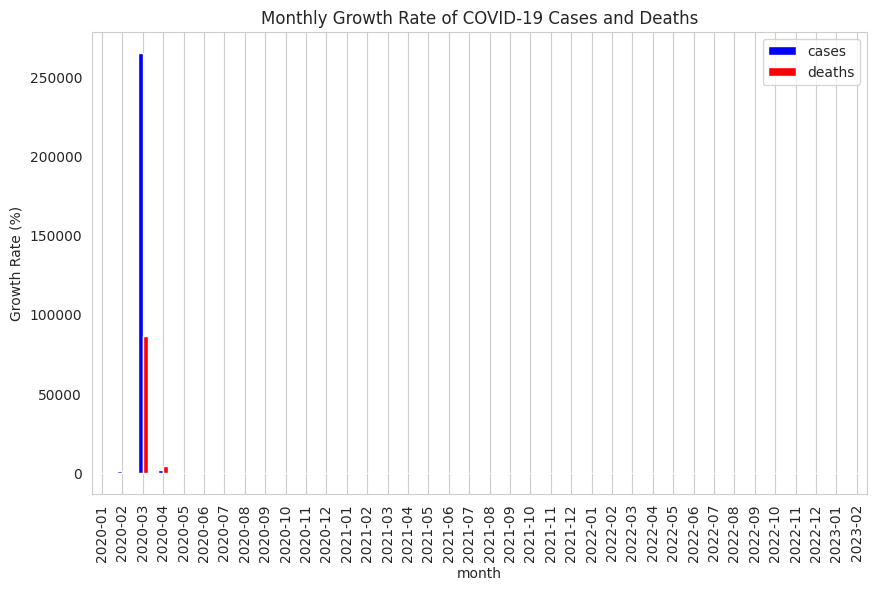

In [18]:
# Step 7: Monthly Growth Rate Analysis
covid_data['month'] = covid_data['date'].dt.to_period('M')

# Calculate monthly data
monthly_data = covid_data.groupby('month')[['cases', 'deaths']].sum()

# Calculate growth rate
growth_rate = monthly_data.pct_change().fillna(0) * 100

# Plot growth rate
growth_rate.plot(kind='bar', figsize=(10, 6), color=['b', 'r'])
plt.title("Monthly Growth Rate of COVID-19 Cases and Deaths")
plt.ylabel("Growth Rate (%)")
plt.grid(axis='y')
plt.show()


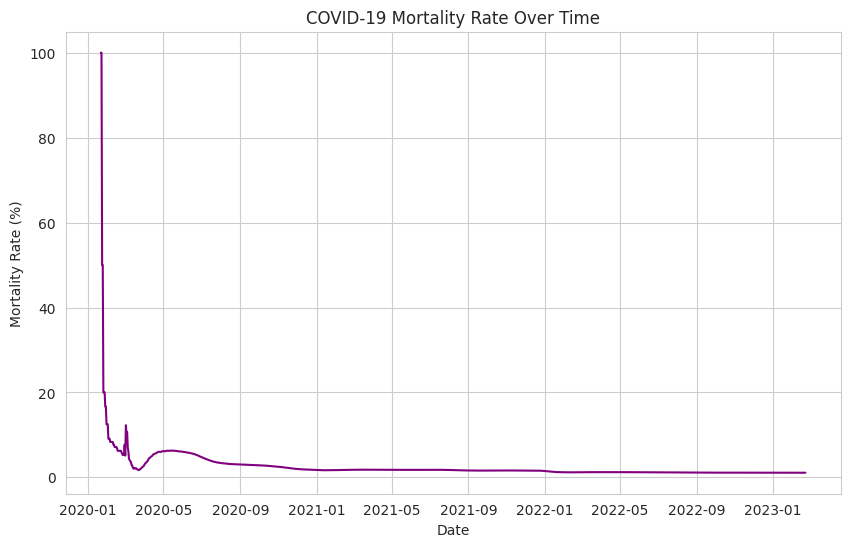

In [19]:
# Step 8: Mortality Rate Analysis
time_series_data['mortality_rate'] = (time_series_data['deaths'] / time_series_data['cases']) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['mortality_rate'], color='purple')
plt.xlabel("Date")
plt.ylabel("Mortality Rate (%)")
plt.title("COVID-19 Mortality Rate Over Time")
plt.grid(True)
plt.show()


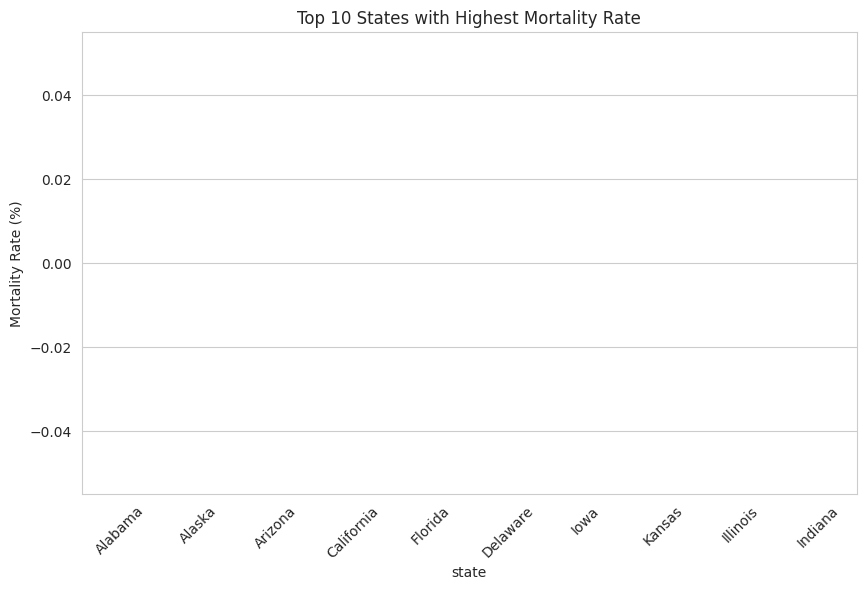

In [20]:
# Step 9: Top 10 Counties/States by Mortality Rate
covid_data['mortality_rate'] = (covid_data['deaths'] / covid_data['cases']) * 100
high_mortality = covid_data.groupby('state')[['mortality_rate']].mean().sort_values(by='mortality_rate', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=high_mortality.index, y=high_mortality['mortality_rate'], palette="inferno")
plt.title("Top 10 States with Highest Mortality Rate")
plt.xticks(rotation=45)
plt.ylabel("Mortality Rate (%)")
plt.show()


In [21]:
# Step 10: Age Demographics Analysis
if 'age' in covid_data.columns:
    age_groups = pd.cut(covid_data['age'], bins=[0, 18, 35, 50, 65, 100], labels=["0-18", "19-35", "36-50", "51-65", "66+"])
    age_analysis = covid_data.groupby(age_groups)[['cases', 'deaths']].sum()

    # Plotting
    age_analysis.plot(kind='bar', figsize=(10, 6), color=['b', 'r'])
    plt.title("COVID-19 Impact on Different Age Groups")
    plt.ylabel("Counts")
    plt.show()
else:
    print("Age data not available in the dataset.")


Age data not available in the dataset.


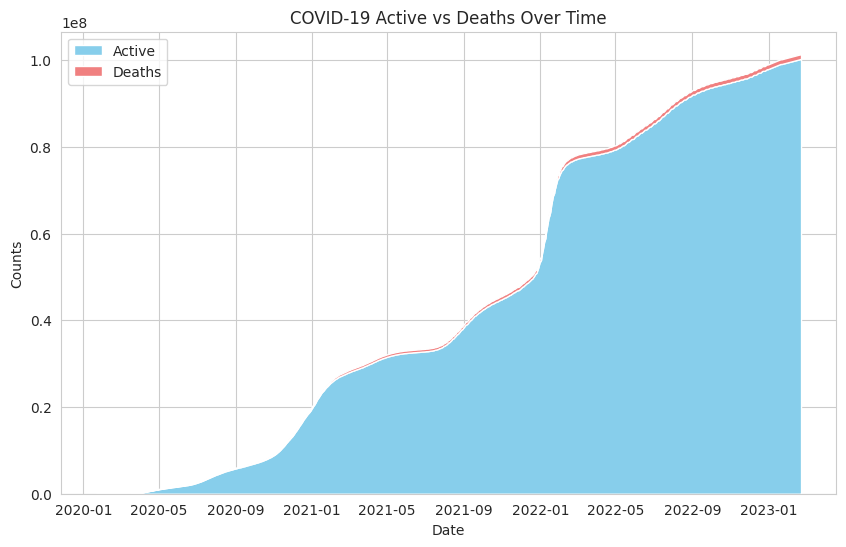

In [22]:
# Step 11: Active vs Recovered vs Deaths Over Time
covid_data['active'] = covid_data['cases'] - covid_data['deaths']

# Group by date
time_series_data = covid_data.groupby('date')[['active', 'deaths', 'cases']].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.stackplot(time_series_data.index, 
              time_series_data['active'], 
              time_series_data['deaths'], 
              labels=['Active', 'Deaths'], 
              colors=['skyblue', 'lightcoral'])

plt.title("COVID-19 Active vs Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


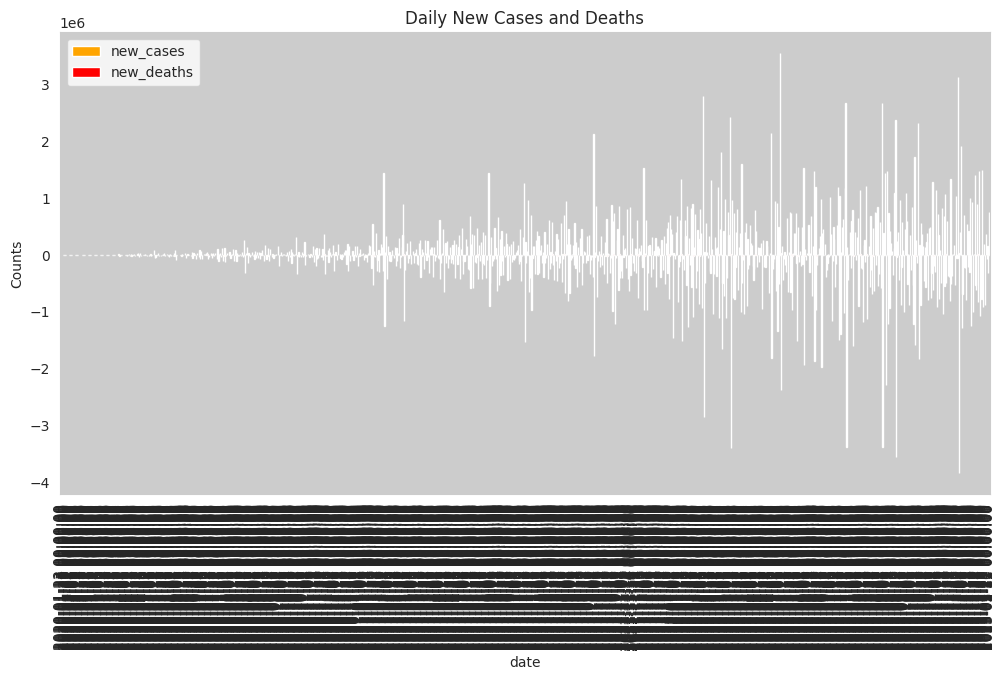

In [23]:
# Step 12: Daily New Cases and Deaths
covid_data['new_cases'] = covid_data.groupby('state')['cases'].diff().fillna(0)
covid_data['new_deaths'] = covid_data.groupby('state')['deaths'].diff().fillna(0)

# Group by date
daily_data = covid_data.groupby('date')[['new_cases', 'new_deaths']].sum()

# Plotting
daily_data.plot(kind='bar', figsize=(12, 6), color=['orange', 'red'])
plt.title("Daily New Cases and Deaths")
plt.ylabel("Counts")
plt.show()


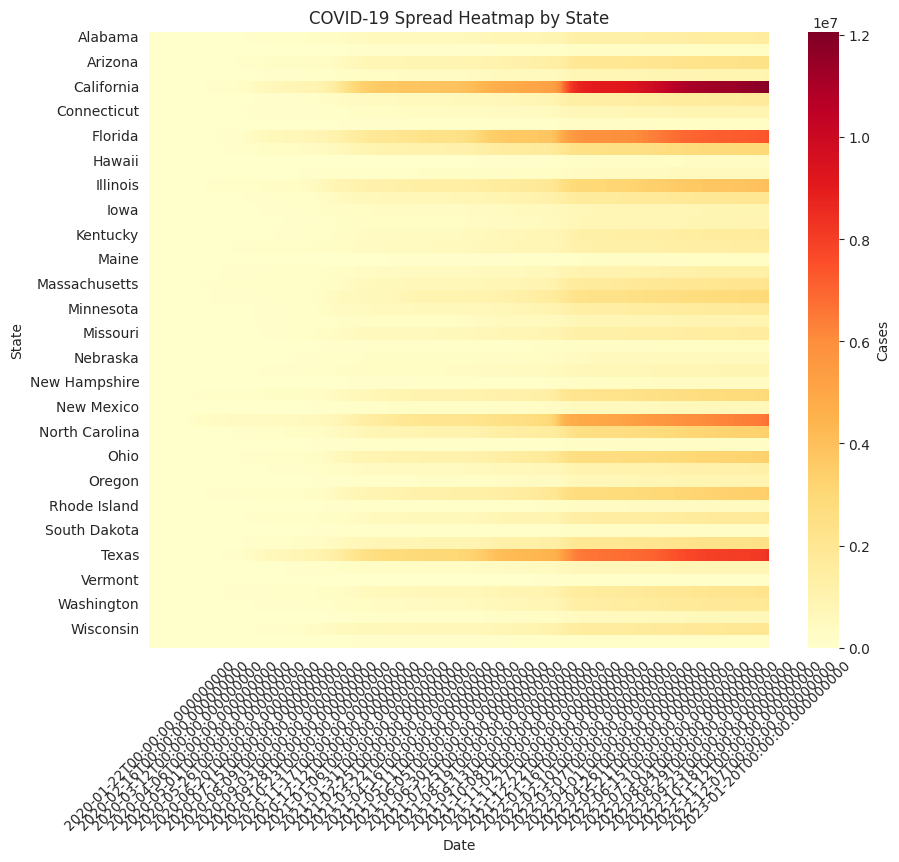

In [24]:
# Step 13: State-wise Heatmap
state_data = covid_data.groupby(['state', 'date'])[['cases', 'deaths']].sum().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(state_data['cases'], cmap="YlOrRd", cbar_kws={'label': 'Cases'})
plt.title("COVID-19 Spread Heatmap by State")
plt.xlabel("Date")
plt.ylabel("State")
plt.xticks(rotation=45)
plt.show()


In [25]:
import plotly.express as px

# Step 14: Animated Time Series
animated_data = covid_data.groupby(['date', 'state'])[['cases', 'deaths']].sum().reset_index()
fig = px.bar(animated_data, 
             x="state", 
             y="cases", 
             color="deaths", 
             animation_frame="date",
             range_y=[0, animated_data['cases'].max()],
             title="COVID-19 Spread Over Time")
fig.show()


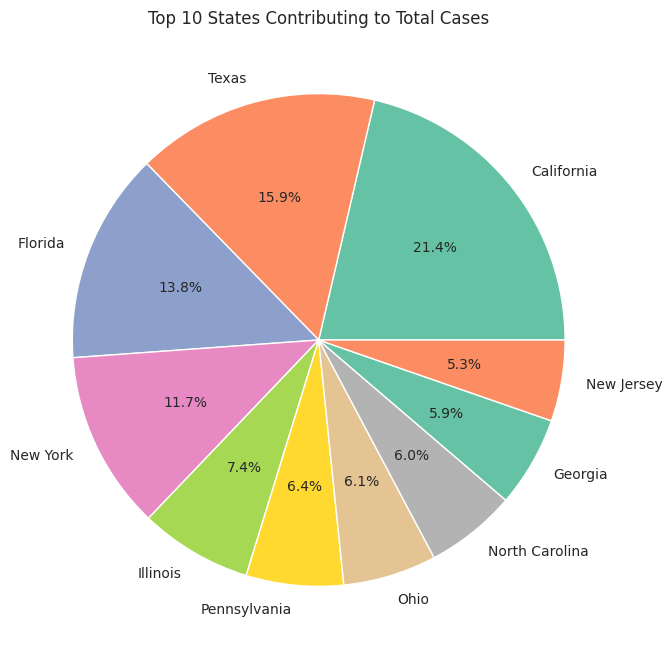

In [26]:
# Step 17: State-wise Distribution (Pie Chart)
state_distribution = covid_data.groupby('state')['cases'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(state_distribution, labels=state_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Top 10 States Contributing to Total Cases")
plt.show()
